# Numerical Exercises 08

Before running this notebook, you need to...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes    # zoomed up image libraries
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.integrate import quad
import scipy.stats
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.style as style 
style.use('tableau-colorblind10')

# Exercise 08.2
## Variational Monte Carlo Methods (VMC)

The goal of this exercise is to minimize the energy of the following Hamiltonian, representing a single quantum particle in 1D space: 

$$
\hat H = \frac{\hat p^2}{2m} + \hat x^4 - \frac{5}{2} \hat x^2,
$$

exploiting the variational principle. As a matter of fact, the Schroedinger equation for such Hamiltonian (or more in general for a many-body hamiltonian) is not exactly solvable, and to get an estimate of the ground state energy we have to use the variational principal, which states that the variational energy $E_T$ for any wavefunction $\psi_T$ will always be higher than the ground state energy:

$$
E_T = \frac{\langle \psi_T | \hat H | \psi_T \rangle}{\langle \psi_T| \psi_T \rangle} \geq E_0 = \frac{\langle \psi_0 | \hat H | \psi_0 \rangle}{\langle \psi_0| \psi_0 \rangle}.
$$

To do so, we first choose an appropriate family of eigenfunctions: our choice is

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}},
$$

which has the same parity as the Hamiltonian potential, and $\mu$ and $\sigma$ are the variational parameters to optimize. Then the $E_{GS}$ will be approximated by: 

$$
\langle {\hat H} \rangle_T =  
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} =
\int dx p(x) E_{loc}(x).
$$

The algorithm is:

1. Choose start value for $\mu$ and $\sigma$
2. **Metropolis algorithm** to generate $x$ points distributed as $p(x)$
3. use these points to compute a **MC** integration over $E_{loc}$ with blocking method to find uncertainties; it's worth noticing that the computation of $E_{GS}$ is exact, because its uncertainty is within the statistical uncertainty of the Monte Carlo calculation. Our estimate  will be given by:

$$
\langle\hat{H}\rangle_T=\frac{1}{M} \sum_{i=1}^M E_\text{loc}(x_i),
$$

   where $M$ is the number of sampled points.

4. Tuning $\mu$ and $\sigma$, and repeat from 2., until a best estimation of $E_{GS}$ is reached

<ipython-input-4-4fbeaf84ff4f>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<H> is minimized when mu = 0.8 , sigma = 0.62


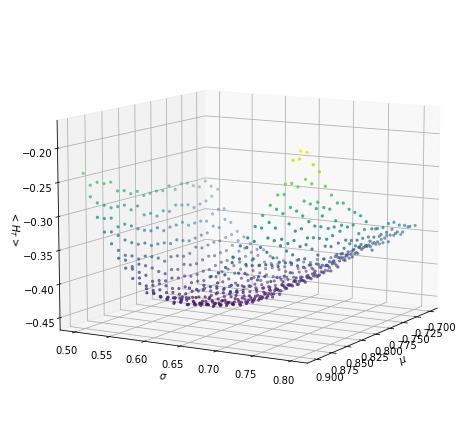

In [4]:
mu, sigma, H = np.loadtxt("build/ex08.2/variational.dat", usecols=(0,1,2), unpack = True)

fig = plt.figure(figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(mu, sigma, H, c=H, marker='.')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$<H_T>$')
ax.view_init(10, 30)

print("<H> is minimized when mu =", mu[np.argsort(H)[0]], ", sigma =", sigma[np.argsort(H)[0]])

In the following graph we compare our result with the one obtained with the following consideration: even though the Schroedinger equation has no analytical solution, we can discretize the 3D space with a lattice of $N$ points and evaluate the wavefunction in each of these points. 

Under this consideration, the Schroedinger equation can be re-written in matricial form as follow: 

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

and we can obtain the eigenvalues and eigenstates of this matrix with the calculation below.

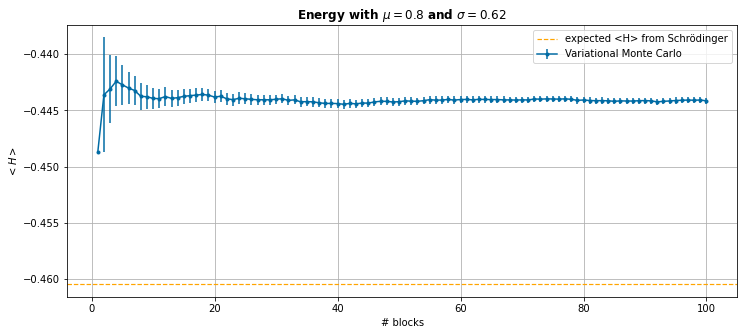

In [9]:
x, y, err = np.loadtxt('build/ex08.2/energy.dat', delimiter=" ", unpack=True)
Etrue = -0.46046587969271563

fig=plt.figure(figsize=(12, 5))
plt.title("Energy with $\mu=0.8$ and $\sigma=0.62$", weight='bold')
plt.errorbar(x, y, yerr=err, label='Variational Monte Carlo', marker='.')
plt.axhline(y=Etrue,linewidth=1.2,linestyle='--', color='orange',label='expected <H> from Schr√∂dinger')
plt.ylabel('$<H>$')
plt.xlabel('# blocks')
plt.legend()
plt.grid(True)
plt.show()

Here we show the theoretical predictions for the probability densities of the ground state and of the first two excited states from the matricial Schroedinger's equation.

Ground state energy:  -0.46045845079911835
1st excited state energy:  0.09744706661807169
2nd excited state energy:  1.9718077373830059


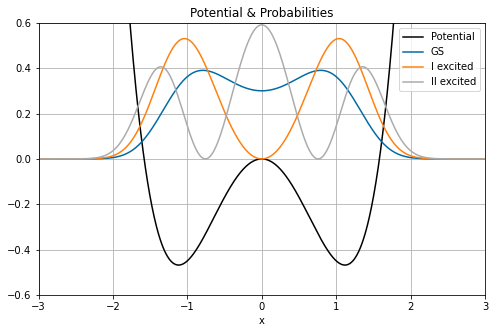

In [3]:
MU=0.79
SIGMA=0.62
def Vpot(x): return (x**2 - 2.5)*x**2

def p(x, MU, SIGMA):
    return (np.exp(-(x-MU)**2/(2*(SIGMA)**2)) + np.exp(-(x+MU)**2/(2*(SIGMA)**2)))**2
norm = quad(p, -3, 3, args=(MU,SIGMA))[0]

N = 1000 # number of iterations
hbar = 1
m = 1

x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,ps = np.linalg.eigh(H)
ps = np.transpose(ps)
ps = ps/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(ps[0])**2, label='GS')
plt.plot(x,(ps[1])**2, label='I excited')
plt.plot(x,(ps[2])**2, label='II excited')
plt.title("Potential & Probabilities")
plt.legend()
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Last but not least, we plot the graph of $|\Psi_T(x)|^2$, compared with the solution of the discretized Schroedinger equation and its analytical prediction (the normalized wavefunction $\Psi_T^{\mu, \sigma}$ where the optimal parameters are chose)

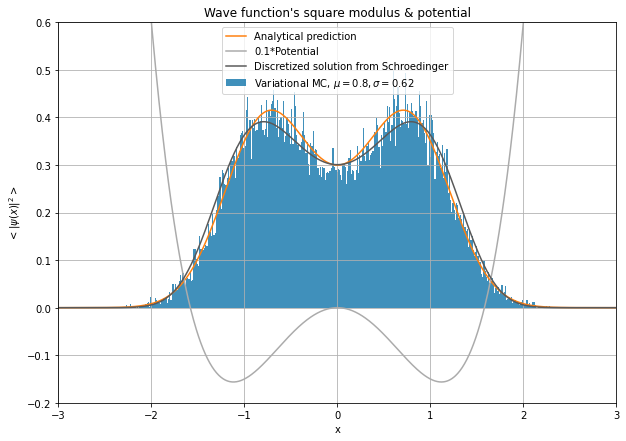

In [8]:
psi= np.loadtxt("build/ex08.2/psi_sq.dat",)
plt.figure(figsize=(10,7))
x=np.linspace(-3,3,1000)
plt.hist(psi, 400, density=True, alpha=0.75, label="Variational MC, $\mu=0.8, \sigma=0.62$")
#plt.plot(x_lin,psi_teo[0]**2, label="Analytic")
plt.plot(x,p(x, MU, SIGMA)/norm, label="Analytical prediction")
plt.plot(x, 0.1*Vpot(x), label='0.1*Potential')
plt.plot(x, ps[0]**2, label='Discretized solution from Schroedinger')
plt.legend()
plt.ylim(-0.2, 0.6)
plt.xlim(-3,3)
plt.grid(True)
plt.xlabel("x")
plt.title("Wave function's square modulus & potential")
plt.ylabel("$< |\psi(x)|^2 >$" )

plt.show()